In [1]:
import pandas as pd
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
from sklearn.preprocessing import LabelEncoder


data = df.copy()


categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", list(categorical_cols))


le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


data.head()


Categorical columns to encode: ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [5]:
from sklearn.model_selection import train_test_split


X = data.drop("booking_complete", axis=1)
y = data["booking_complete"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (40000, 13)
Test set: (10000, 13)


In [7]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


y_pred[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:

y_train.value_counts(normalize=True)


booking_complete
0    0.85005
1    0.14995
Name: proportion, dtype: float64

In [11]:
from sklearn.metrics import classification_report, confusion_matrix


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[8395  125]
 [1313  167]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



In [13]:

rf_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)


y_pred_balanced = rf_balanced.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))


Confusion Matrix:
 [[8415  105]
 [1330  150]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.59      0.10      0.17      1480

    accuracy                           0.86     10000
   macro avg       0.73      0.54      0.55     10000
weighted avg       0.82      0.86      0.81     10000



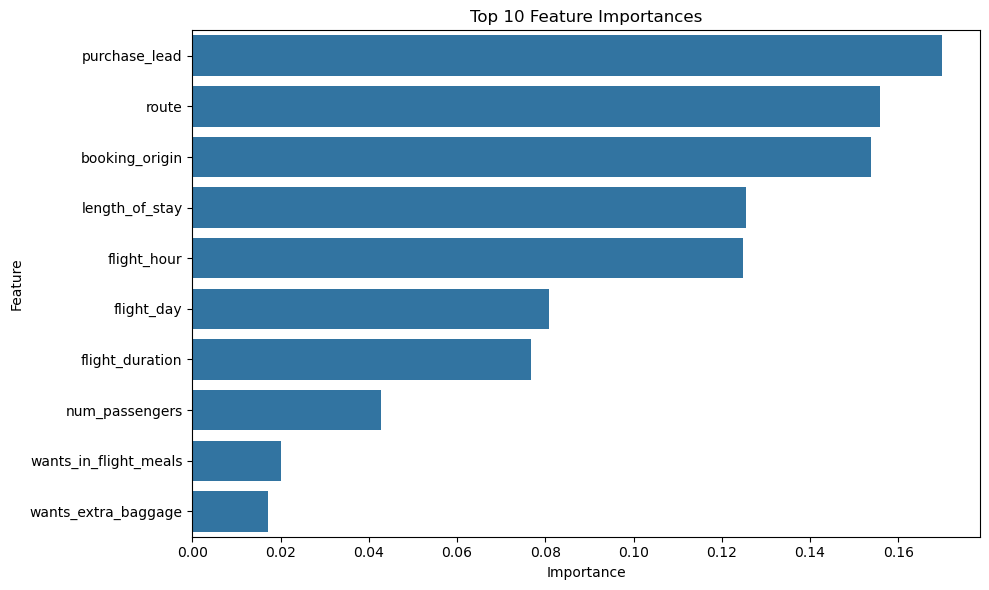

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_balanced.feature_importances_
feature_names = X.columns


feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

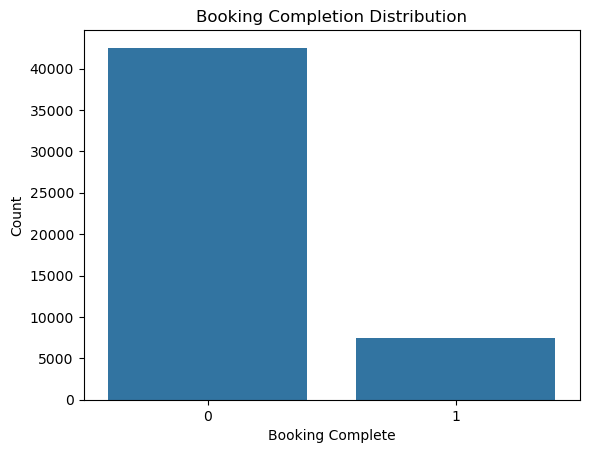

In [13]:
sns.countplot(x='booking_complete', data=df)
plt.title('Booking Completion Distribution')
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.show()

In [15]:
import numpy as np

In [25]:
import pandas as pd
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

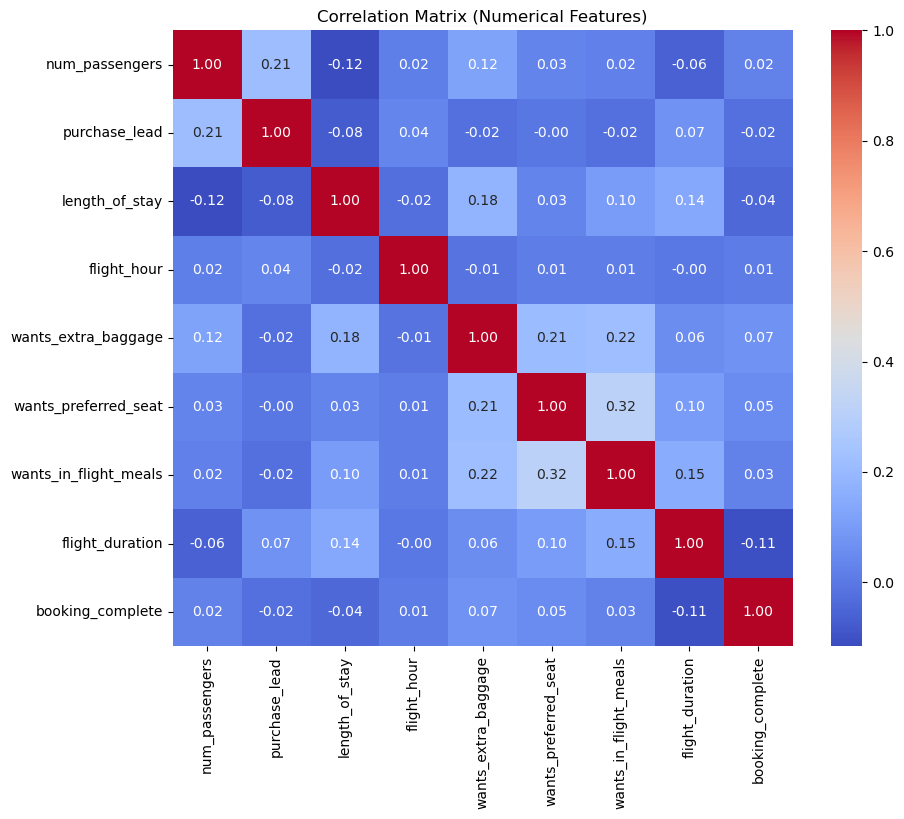

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

In [35]:
data = df.copy()
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()

In [37]:

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

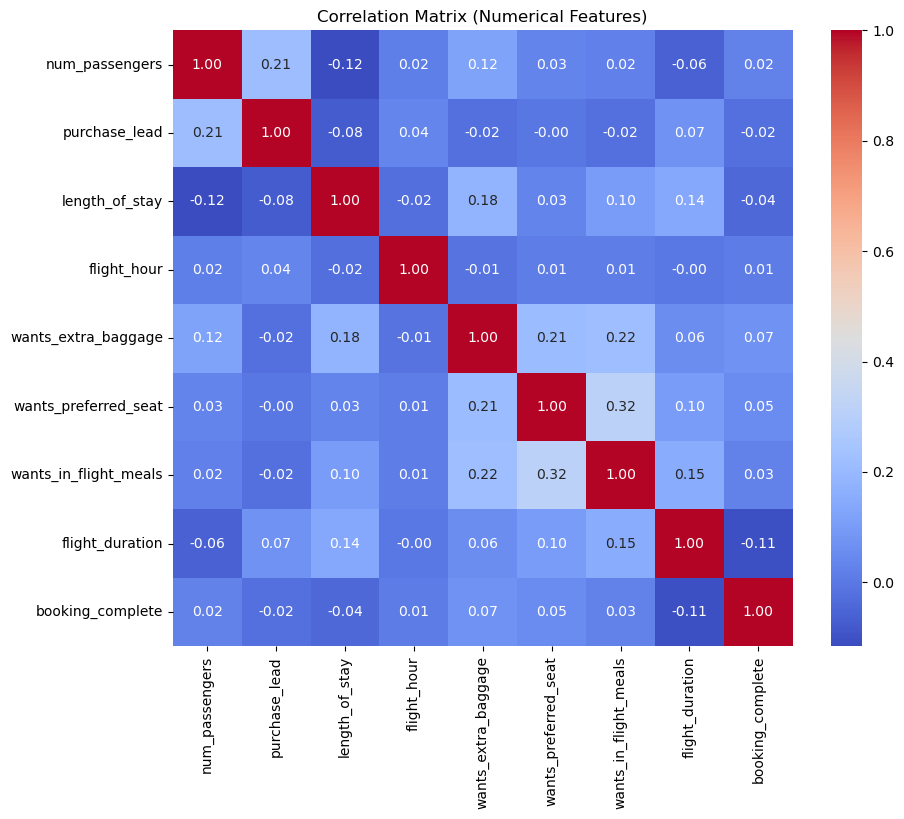

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

In [41]:
from sklearn.metrics import roc_curve, auc

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.preprocessing import LabelEncoder

In [51]:
data = df.copy()
categorical_cols = data.select_dtypes(include=['object']).columns

In [53]:
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [55]:
X = data.drop("booking_complete", axis=1)
y = data["booking_complete"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [65]:
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [67]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

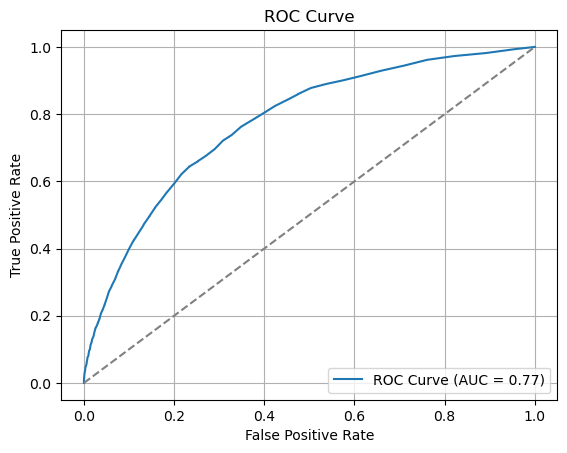

In [69]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()